### Structure of the Western States Power Grid of the United States in the Event of Cascading Outages  
### Tucker Knaak (Dr. Margaret Doig), Department of Mathematics, Creighton University, Omaha, NE -  2023.
#### We consider the Western States Power Grid of the United States and investigate how the removal of edges (power lines) and nodes (power stations) afffects the local and global efficiencies of the power grid.  We implemented algorithms to remove the edges and nodes with the highest betweenness centralities and then to remove random edges and nodes.  Lastly, we determined how the removal of edges and nodes could cause cascading outages throughout the power grid.

In [1]:
#Imports
import matplotlib.pyplot as plt
from tabulate import tabulate
import networkx as nx
import numpy as np

#### The following cell defines the class power_grid() which implements all of the relevant algorithms to draw the network, remove edges and nodes, calculate efficiencies, and determine whether cascading outages could occur.

In [2]:
class power_grid():
    
    #Initializing all of the relevant networks, dictionaries, lists, and values
    def __init__(self, network):
        self.network = network
        self.edge_list = list(network.edges)
        self.edge_bc_dict = nx.edge_betweenness_centrality(self.network)
        self.edge_bc_list = np.array([value for value in self.edge_bc_dict.values()])
        self.edge_bc_avg = round(np.average(self.edge_bc_list), 4)
        self.edge_bc_std = round(np.std(self.edge_bc_list), 4)
        self.edge_rnd_list = []
        self.node_list = list(network.nodes)
        self.node_bc_dict = nx.betweenness_centrality(self.network)
        self.node_bc_list = np.array([value for value in self.node_bc_dict.values()])
        self.node_bc_avg = round(np.average(self.node_bc_list), 4)
        self.node_bc_std = round(np.std(self.node_bc_list), 4)
        self.node_rnd_list = []
        self.efficiency_table = [['Local Efficiency', 'Global Efficiency', 'Clustering Coefficient']]
        self.local_eff = 0.0
        self.global_eff = 0.0
        self.cluster_coeff = 0.0
    
    
    #Defining a function to draw the network
    def draw_network(self, title):
        plt.figure(figsize = (10, 6), dpi = 100)
        nx.draw(self.network, node_size = 5, node_color = 'red', with_labels = False)
        plt.title('Western States Power Grid of the United States {}'.format(title))
        plt.show()
    
    
    #Defining a function to calculate and report the local and global efficiencies as well as the clustering coefficient
    def efficiencies(self):
        self.local_eff = round(nx.local_efficiency(self.network), 4)
        self.global_eff = round(nx.global_efficiency(self.network), 4)
        self.cluster_coeff = round(nx.average_clustering(self.network), 4)
        self.efficiency_table.append([self.local_eff, self.global_eff, self.cluster_coeff])
        print(tabulate(self.efficiency_table, tablefmt = 'fancy_grid', numalign = 'center'))
        
        
    #Defining a function to plot the betweenness centrality of both the edges and the nodes
    def plot_bc(self, title):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 5), gridspec_kw = {'width_ratios': [1, 1]})

        #Edge betweenness centrality
        ax1.plot(self.edge_bc_list, linestyle = 'solid', linewidth = 0.5, color = 'black',
                 marker = '.', markersize = 1.5, markerfacecolor = 'red', markeredgecolor = 'red')
        ax1.set_xlabel('Edge')
        ax1.set_ylabel('Edge Betweenness Centrality')
        ax1.set_title('WSPG {}'.format(title))
        ax1.annotate('AVG = {}'.format(self.edge_bc_avg), (0.0, max(self.edge_bc_list) - 0.01), size = 12)
        ax1.annotate('STD = {}'.format(self.edge_bc_std), (0.0, max(self.edge_bc_list) - 0.025), size = 12)

        #Node betweenness centrality
        ax2.plot(self.node_bc_list, linestyle = 'solid', linewidth = 0.5, color = 'black',
                 marker = '.', markersize = 1.5, markerfacecolor = 'red', markeredgecolor = 'red')
        ax2.set_xlabel('Node')
        ax2.set_ylabel('Node Betweenness Centrality')
        ax2.set_title('WSPG {}'.format(title))
        ax2.annotate('AVG = {}'.format(self.node_bc_avg), (0.0, max(self.node_bc_list) - 0.01), size = 12)
        ax2.annotate('STD = {}'.format(self.node_bc_std), (0.0, max(self.node_bc_list) - 0.025), size = 12)
    
    
    #Defining a function to remove edges with a betweenness centrality higher than N standard deviations above the average
    def delete_edges_std(self, N):
        for edge in self.edge_bc_dict:
            if self.edge_bc_dict[edge] >= (self.edge_bc_avg + (N * self.edge_bc_std)):
                self.network.remove_edge(edge[0], edge[1])
        self.edge_bc_dict = nx.edge_betweenness_centrality(self.network)
        self.edge_bc_list = np.array([value for value in self.edge_bc_dict.values()])
        self.edge_bc_avg = round(np.average(self.edge_bc_list), 4)
        self.edge_bc_std = round(np.std(self.edge_bc_list), 4)
        
    
    #Defining a function to remove random edges
    def delete_edges_rnd(self):
        rnd_list = np.unique(np.random.randint(len(self.edge_list), size = int((len(self.edge_list) * 0.1))))
        for index in rnd_list:
            self.edge_rnd_list.append(self.edge_list[index])
        self.network.remove_edges_from(self.edge_rnd_list)
        self.edge_bc_dict = nx.edge_betweenness_centrality(self.network)
        self.edge_bc_list = np.array([value for value in self.edge_bc_dict.values()])
        self.edge_bc_avg = round(np.average(self.edge_bc_list), 4)
        self.edge_bc_std = round(np.std(self.edge_bc_list), 4)
        
    
    #Defining a function to remove nodes with a betweenness centrality higher than N standard deviations above the average
    def delete_nodes_std(self, N):
        for node in self.node_bc_dict:
            if self.node_bc_dict[node] >= (self.node_bc_avg + (N * self.node_bc_std)):
                self.network.remove_node(node)
        self.node_bc_dict = nx.betweenness_centrality(self.network)
        self.node_bc_list = np.array([value for value in self.node_bc_dict.values()])
        self.node_bc_avg = round(np.average(self.node_bc_list), 4)
        self.node_bc_std = round(np.std(self.node_bc_list), 4)
    
    
    #Defining a function to remove random nodes
    def delete_nodes_rnd(self):
        rnd_list = np.unique(np.random.randint(len(self.node_list), size = int((len(self.node_list) * 0.1))))
        for index in rnd_list:
            self.node_rnd_list.append(self.node_list[index])
        self.network.remove_nodes_from(self.node_rnd_list)
        self.node_bc_dict = nx.betweenness_centrality(self.network)
        self.node_bc_list = np.array([value for value in self.node_bc_dict.values()])
        self.node_bc_avg = round(np.average(self.node_bc_list), 4)
        self.node_bc_std = round(np.std(self.node_bc_list), 4)

#### The following cell draws the initial network (Western States Power Grid of the United States) and then calculates the efficiencies and plots the betweenness centrality of the edges and nodes.

Graph with 4941 nodes and 6594 edges


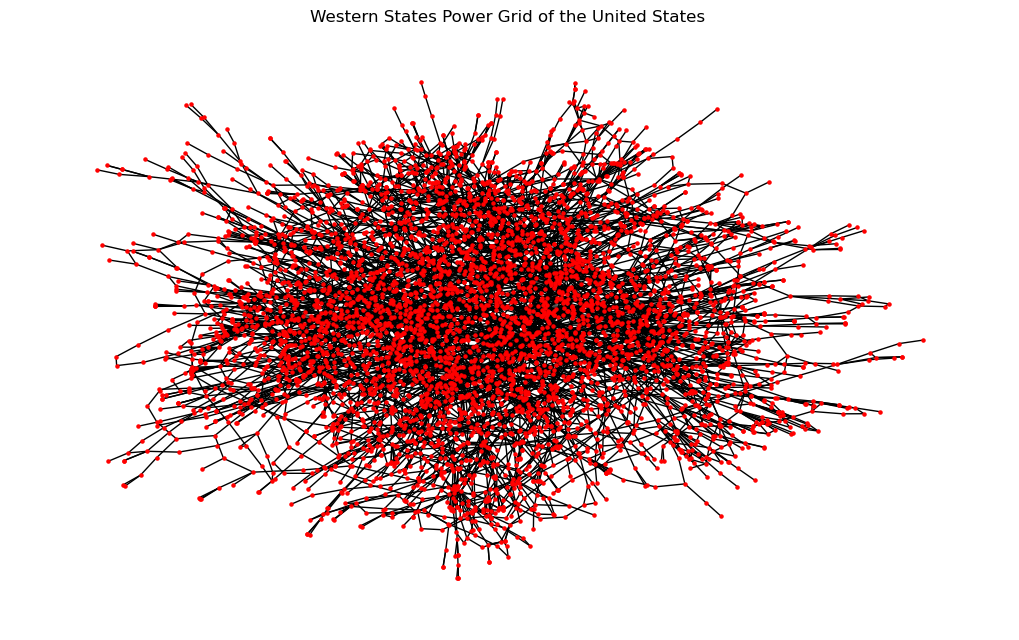

╒══════════════════╤═══════════════════╤════════════════════════╕
│ Local Efficiency │ Global Efficiency │ Clustering Coefficient │
├──────────────────┼───────────────────┼────────────────────────┤
│ 0.0845           │ 0.0629            │ 0.0801                 │
╘══════════════════╧═══════════════════╧════════════════════════╛


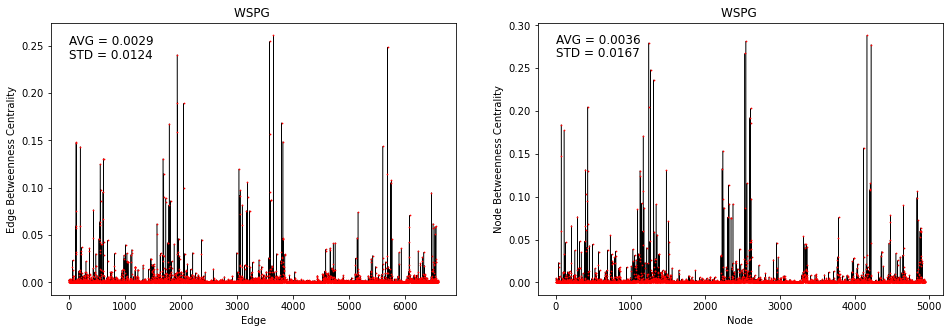

In [3]:
wspg = power_grid(nx.read_gml('power.gml', label = 'id'))
print(wspg.network)
wspg.draw_network('')
wspg.efficiencies()
wspg.plot_bc('')

#### The following cell first deletes edges with a betweenness centrality value larger than two standard deviations above the average and then draws the new network, calculates the efficiencies, and plots the betweenness centralities.

Graph with 4941 nodes and 6466 edges


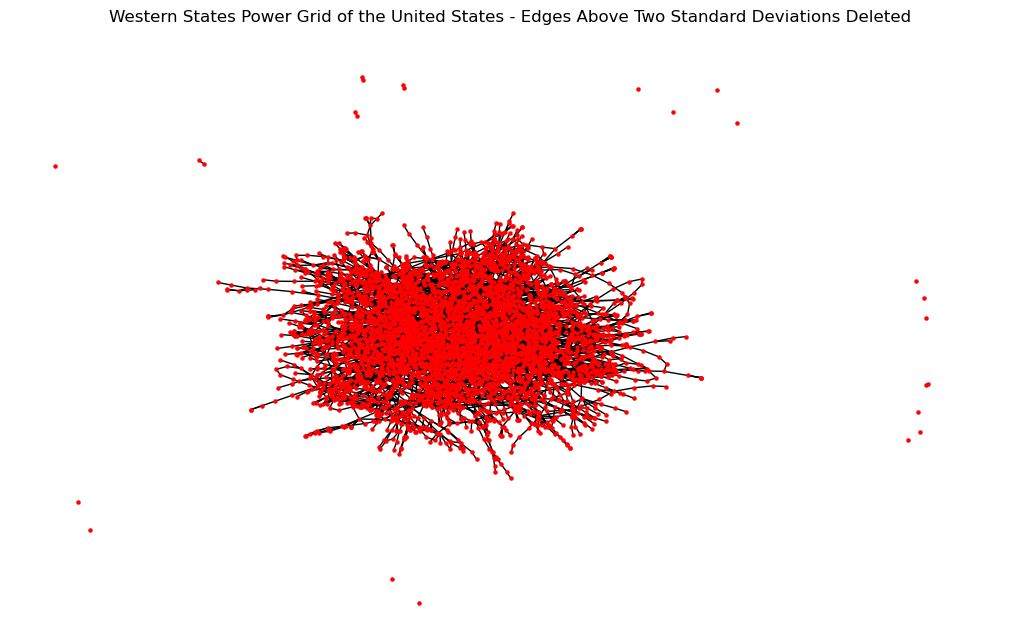

╒══════════════════╤═══════════════════╤════════════════════════╕
│ Local Efficiency │ Global Efficiency │ Clustering Coefficient │
├──────────────────┼───────────────────┼────────────────────────┤
│ 0.0831           │ 0.0435            │ 0.0787                 │
╘══════════════════╧═══════════════════╧════════════════════════╛


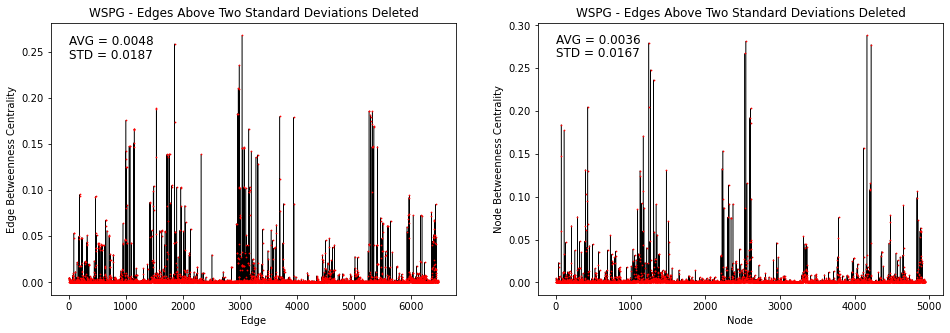

In [4]:
wspg_edge_2std = power_grid(nx.read_gml('power.gml', label = 'id'))
wspg_edge_2std.delete_edges_std(2)
print(wspg_edge_2std.network)
wspg_edge_2std.draw_network('- Edges Above Two Standard Deviations Deleted')
wspg_edge_2std.efficiencies()
wspg_edge_2std.plot_bc('- Edges Above Two Standard Deviations Deleted')

#### The following cell first deletes edges with a betweenness centrality value larger than one standard deviation above the average and then draws the new network, calculates the efficiencies, and plots the betweenness centralities.

Graph with 4941 nodes and 6385 edges


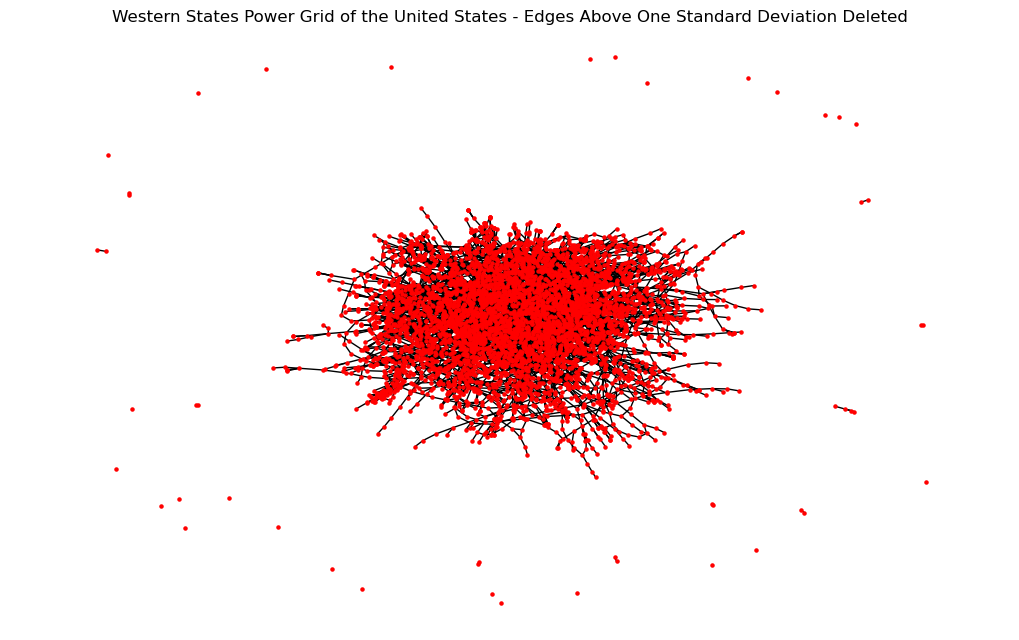

╒══════════════════╤═══════════════════╤════════════════════════╕
│ Local Efficiency │ Global Efficiency │ Clustering Coefficient │
├──────────────────┼───────────────────┼────────────────────────┤
│ 0.0817           │ 0.0372            │ 0.0775                 │
╘══════════════════╧═══════════════════╧════════════════════════╛


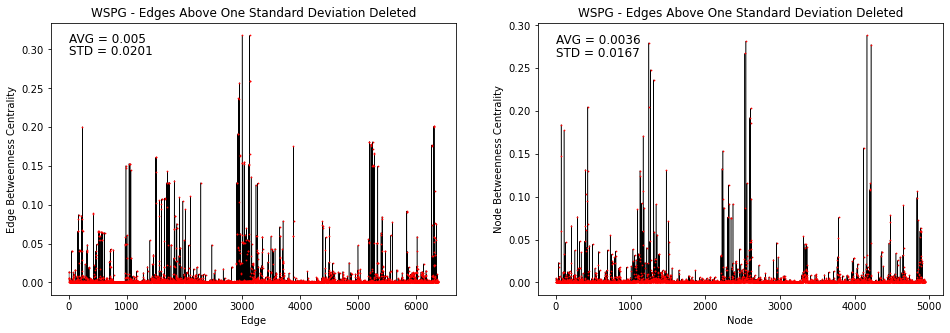

In [5]:
wspg_edge_1std = power_grid(nx.read_gml('power.gml', label = 'id'))
wspg_edge_1std.delete_edges_std(1)
print(wspg_edge_1std.network)
wspg_edge_1std.draw_network('- Edges Above One Standard Deviation Deleted')
wspg_edge_1std.efficiencies()
wspg_edge_1std.plot_bc('- Edges Above One Standard Deviation Deleted')

#### The following cell first randomly deletes approximately 10% of the edges and then draws the new network, calculates the efficiencies, and plots the betweenness centralities.

Graph with 4941 nodes and 5969 edges


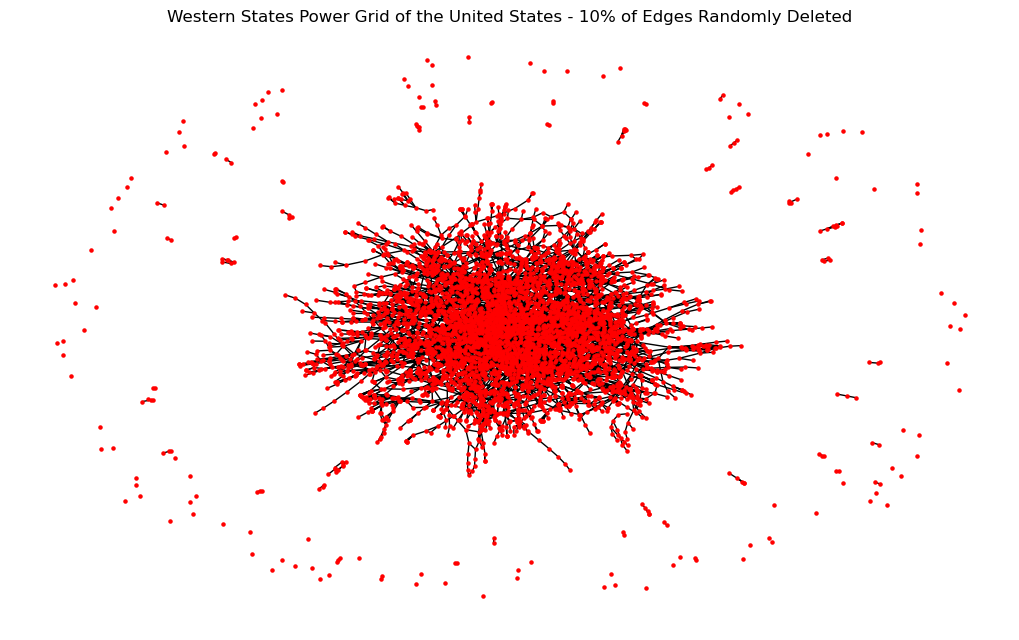

╒══════════════════╤═══════════════════╤════════════════════════╕
│ Local Efficiency │ Global Efficiency │ Clustering Coefficient │
├──────────────────┼───────────────────┼────────────────────────┤
│ 0.0692           │ 0.0513            │ 0.0658                 │
╘══════════════════╧═══════════════════╧════════════════════════╛


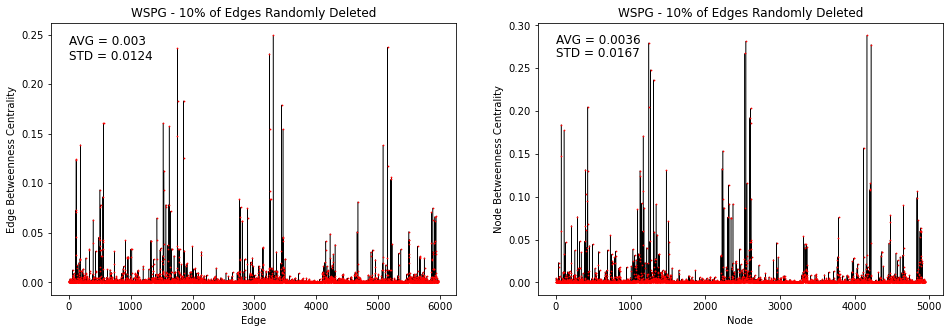

In [6]:
wspg_edge_rnd = power_grid(nx.read_gml('power.gml', label = 'id'))
wspg_edge_rnd.delete_edges_rnd()
print(wspg_edge_rnd.network)
wspg_edge_rnd.draw_network('- 10% of Edges Randomly Deleted')
wspg_edge_rnd.efficiencies()
wspg_edge_rnd.plot_bc('- 10% of Edges Randomly Deleted')

#### The following cell first deletes nodes with a betweenness centrality value larger than two standard deviations above the average and then draws the new network, calculates the efficiencies, and plots the betweenness centralities.

Graph with 4842 nodes and 6141 edges


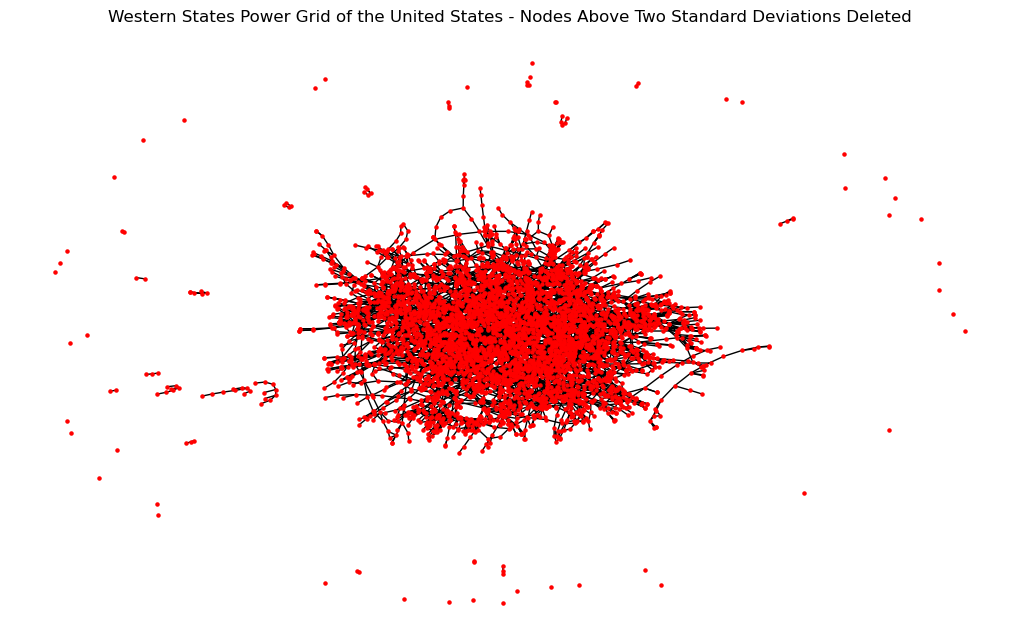

╒══════════════════╤═══════════════════╤════════════════════════╕
│ Local Efficiency │ Global Efficiency │ Clustering Coefficient │
├──────────────────┼───────────────────┼────────────────────────┤
│ 0.0819           │ 0.0271            │ 0.0777                 │
╘══════════════════╧═══════════════════╧════════════════════════╛


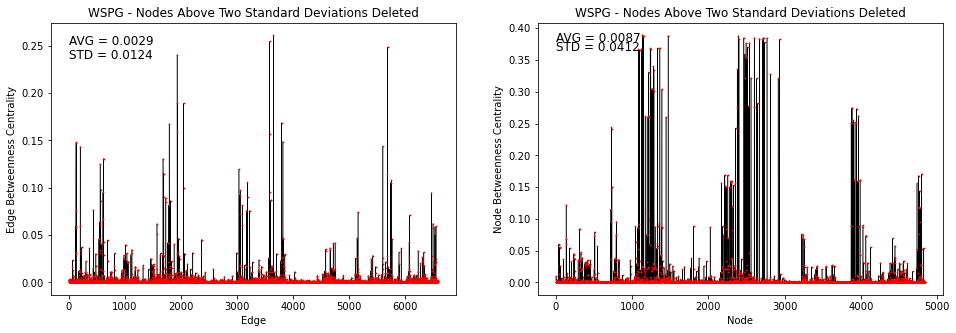

In [7]:
wspg_node_2std = power_grid(nx.read_gml('power.gml', label = 'id'))
wspg_node_2std.delete_nodes_std(2)
print(wspg_node_2std.network)
wspg_node_2std.draw_network('- Nodes Above Two Standard Deviations Deleted')
wspg_node_2std.efficiencies()
wspg_node_2std.plot_bc('- Nodes Above Two Standard Deviations Deleted')

#### The following cell first deletes nodes with a betweenness centrality value larger than one standard deviations above the average and then draws the new network, calculates the efficiencies, and plots the betweenness centralities.

Graph with 4772 nodes and 5885 edges


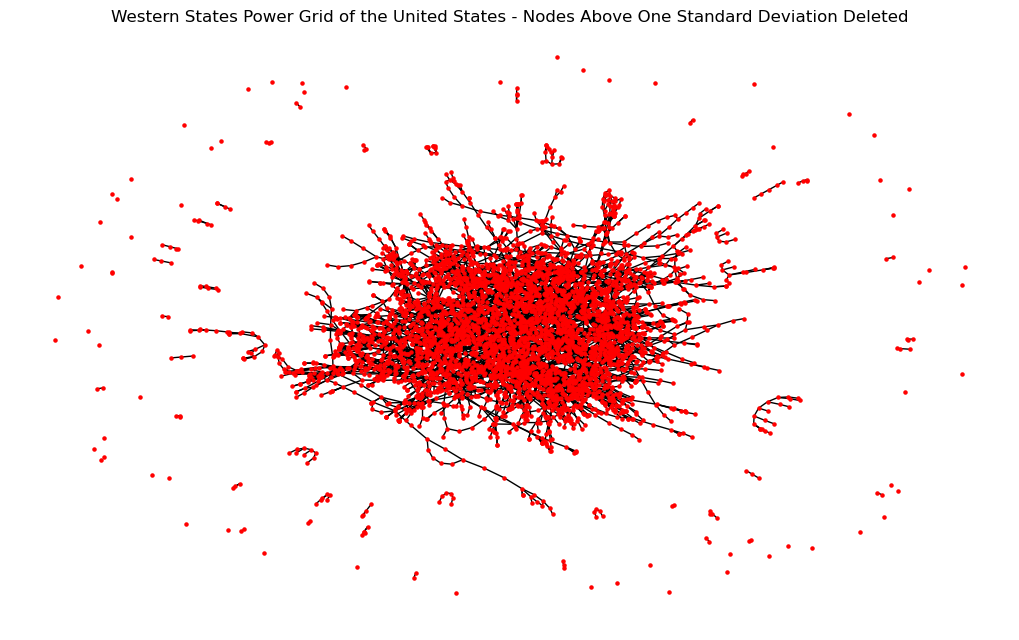

╒══════════════════╤═══════════════════╤════════════════════════╕
│ Local Efficiency │ Global Efficiency │ Clustering Coefficient │
├──────────────────┼───────────────────┼────────────────────────┤
│ 0.0813           │ 0.0197            │ 0.0772                 │
╘══════════════════╧═══════════════════╧════════════════════════╛


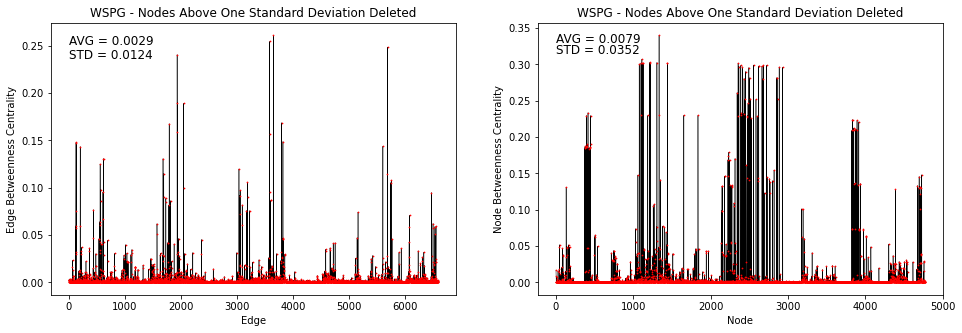

In [8]:
wspg_node_1std = power_grid(nx.read_gml('power.gml', label = 'id'))
wspg_node_1std.delete_nodes_std(1)
print(wspg_node_1std.network)
wspg_node_1std.draw_network('- Nodes Above One Standard Deviation Deleted')
wspg_node_1std.efficiencies()
wspg_node_1std.plot_bc('- Nodes Above One Standard Deviation Deleted')

#### The following cell first randomly deletes approximately 10% of the nodes and then draws the new network, calculates the efficiencies, and plots the betweenness centralities.

Graph with 4470 nodes and 5342 edges


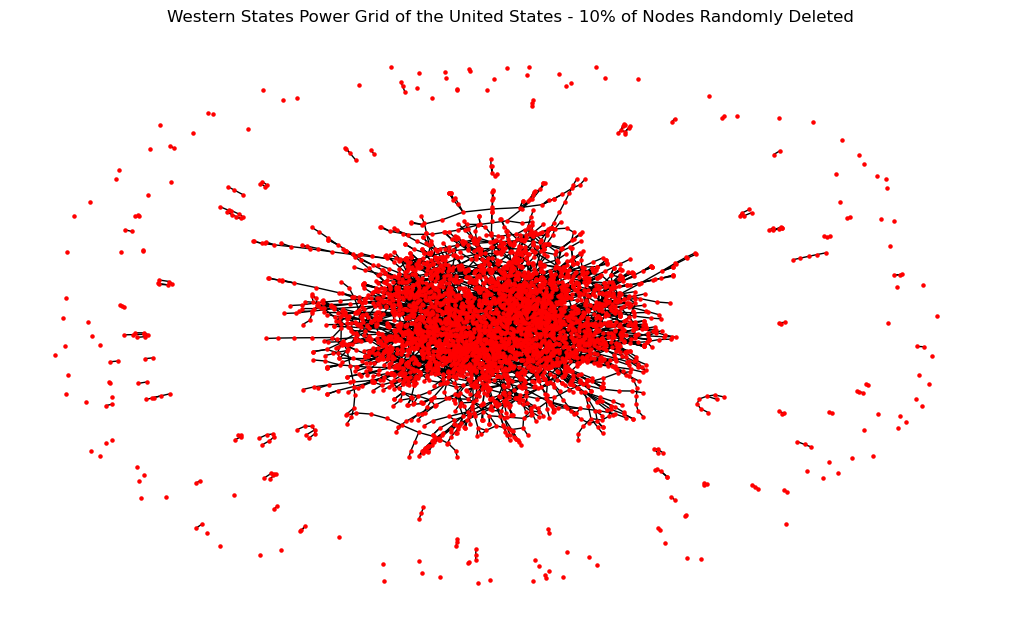

╒══════════════════╤═══════════════════╤════════════════════════╕
│ Local Efficiency │ Global Efficiency │ Clustering Coefficient │
├──────────────────┼───────────────────┼────────────────────────┤
│ 0.0774           │ 0.0398            │ 0.0737                 │
╘══════════════════╧═══════════════════╧════════════════════════╛


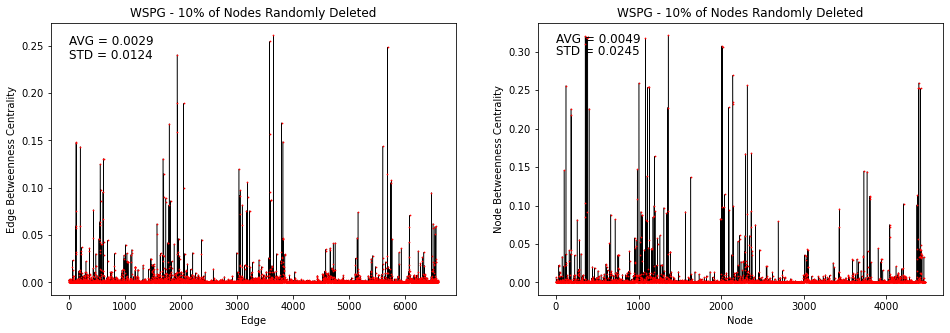

In [9]:
wspg_node_rnd = power_grid(nx.read_gml('power.gml', label = 'id'))
wspg_node_rnd.delete_nodes_rnd()
print(wspg_node_rnd.network)
wspg_node_rnd.draw_network('- 10% of Nodes Randomly Deleted')
wspg_node_rnd.efficiencies()
wspg_node_rnd.plot_bc('- 10% of Nodes Randomly Deleted')